# Count genes biased to Bl6 or wild-derived allele

### Supp. Fig. 4E

In [1]:
#libraries
suppressPackageStartupMessages({
    library(openxlsx)
    library(dplyr)
    library(ggplot2)
    library(wesanderson)
    library(reshape2)
    library(tidytable)
    library(ggVennDiagram)
})

In [2]:
#loading data

cell_types <- c("Deep layer neurons", "Gliogenic progenitor cells", "Hippocampal neurons", "Inhibitory neurons", 
                "Intermediate neuronal prog", "Neurogenic progenitor cells", "Oligodendrocyte prog", "Preplate neurons")
res_dir <- "/data/bbtest_res_ASPEN/updated/"
#Hippocamal neurons are not present in CastBl6 data
cast_bb_test <- list()
cast_bb_test_rdc <- list()
for (i in 1:length(cell_types[-3])){
    cast_bb_test[[i]] <- read.xlsx(paste0(res_dir, "organoids_CAST_exons.xlsx"), sheet = i, rowNames = T)
    cast_bb_test[[i]]$cell_type <- cell_types[-3][i]
    cast_bb_test[[i]]$strain <- "CastB6"
    cast_bb_test[[i]]$log2FC <- ifelse(is.na(cast_bb_test[[i]]$log2FC) & cast_bb_test[[i]]$AI == 1, 12, cast_bb_test[[i]]$log2FC)
    cast_bb_test[[i]]$log2FC <- ifelse(is.na(cast_bb_test[[i]]$log2FC) & cast_bb_test[[i]]$AI == 0, -12, cast_bb_test[[i]]$log2FC)
    cast_bb_test_rdc[[i]] <- cast_bb_test[[i]][,c("fdr_shrunk", "log2FC", "cell_type", "strain")]
}

molf_bb_test <- list()
molf_bb_test_rdc <- list()
for (i in 1:length(cell_types)){
    molf_bb_test[[i]] <- read.xlsx(paste0(res_dir, "organoids_MOLF_exons.xlsx"), sheet = i, rowNames = T)
    molf_bb_test[[i]]$cell_type <- cell_types[i]
    molf_bb_test[[i]]$strain <- "MolfB6"
    molf_bb_test[[i]]$log2FC <- ifelse(is.na(molf_bb_test[[i]]$log2FC) & molf_bb_test[[i]]$AI == 1, 12, molf_bb_test[[i]]$log2FC)
    molf_bb_test[[i]]$log2FC <- ifelse(is.na(molf_bb_test[[i]]$log2FC) & molf_bb_test[[i]]$AI == 0, -12, molf_bb_test[[i]]$log2FC) 
    molf_bb_test_rdc[[i]] <- molf_bb_test[[i]][,c("fdr_shrunk", "log2FC", "cell_type", "strain")]
}

#Hippocamal neurons are not present in PwkBl6 data
pwk_bb_test <- list()
pwk_bb_test_rdc <- list()
for (i in 1:length(cell_types[-3])){
    pwk_bb_test[[i]] <- read.xlsx(paste0(res_dir, "organoids_PWK_exons.xlsx"), sheet = i, rowNames = T)
    pwk_bb_test[[i]]$cell_type <- cell_types[-3][i]
    pwk_bb_test[[i]]$strain <- "PwkB6"
    pwk_bb_test[[i]]$log2FC <- ifelse(is.na(pwk_bb_test[[i]]$log2FC) & pwk_bb_test[[i]]$AI == 1, 12, pwk_bb_test[[i]]$log2FC)
    pwk_bb_test[[i]]$log2FC <- ifelse(is.na(pwk_bb_test[[i]]$log2FC) & pwk_bb_test[[i]]$AI == 0, -12, pwk_bb_test[[i]]$log2FC)
    pwk_bb_test_rdc[[i]] <- pwk_bb_test[[i]][,c("fdr_shrunk", "log2FC", "cell_type", "strain")]
}

spret_bb_test <- list()
spret_bb_test_rdc <- list()
for (i in 1:length(cell_types)){
    spret_bb_test[[i]] <- read.xlsx(paste0(res_dir, "organoids_SPRET_exons.xlsx"), sheet = i, rowNames = T)
    spret_bb_test[[i]]$cell_type <- cell_types[i]
    spret_bb_test[[i]]$strain <- "SpretB6"
    spret_bb_test[[i]]$log2FC <- ifelse(is.na(spret_bb_test[[i]]$log2FC) & spret_bb_test[[i]]$AI == 1, 12, spret_bb_test[[i]]$log2FC)
    spret_bb_test[[i]]$log2FC <- ifelse(is.na(spret_bb_test[[i]]$log2FC) & spret_bb_test[[i]]$AI == 0, -12, spret_bb_test[[i]]$log2FC)
    spret_bb_test_rdc[[i]] <- spret_bb_test[[i]][,c("fdr_shrunk", "log2FC", "cell_type", "strain")]
}

#removing low-abundant cell types - Hippocampal neurons, Inhibitory neurons
cast_bb_test_rdc <- cast_bb_test_rdc[-3]
molf_bb_test_rdc <- molf_bb_test_rdc[-c(3,4)]
pwk_bb_test_rdc <- pwk_bb_test_rdc[-3]
spret_bb_test_rdc <- spret_bb_test_rdc[-c(3,4)]



In [19]:
all_strains <- as.data.frame(do.call(rbind, c(cast_bb_test_rdc,
                                              molf_bb_test_rdc,
                                              pwk_bb_test_rdc,
                                              spret_bb_test_rdc))
)
#summarising data
all_strains$diffASE <- "NO"
all_strains$diffASE[all_strains$log2FC >= 0 & all_strains$fdr_shrunk < 0.05] <- "UP"
all_strains$diffASE[all_strains$log2FC <= 0 & all_strains$fdr_shrunk < 0.05] <- "DOWN"

summary <- all_strains %>%
  dplyr::group_by(cell_type, strain) %>%
  dplyr::summarise(upreg = length(diffASE[diffASE == "UP"]), 
                   downreg = length(diffASE[diffASE == "DOWN"]),
                   notsignif = length(diffASE[diffASE == "NO"]))
head(summary)

`summarise()` has grouped output by 'cell_type'. You can override using the
`.groups` argument.


cell_type,strain,upreg,downreg,notsignif
<chr>,<chr>,<int>,<int>,<int>
Deep layer neurons,CastB6,838,677,4626
Deep layer neurons,MolfB6,1297,1273,4033
Deep layer neurons,PwkB6,1191,1099,4203
Deep layer neurons,SpretB6,2873,1752,5463
Gliogenic progenitor cells,CastB6,848,744,7205
Gliogenic progenitor cells,MolfB6,439,348,3717


In [20]:
summary$cell_type <- recode(summary$cell_type, "Deep layer neurons" = "Cortical neurons", 
                            "Gliogenic progenitor cells" = "Astrocyte progenitors",
                            "Intermediate neuronal prog" = "IPCs",
                            "Neurogenic progenitor cells" = "RGCs",
                            "Oligodendrocyte prog" = "OPCs")
summary$cell_type <- factor(summary$cell_type, levels = c("Cortical neurons", 
                                                          "Astrocyte progenitors",
                                                          "IPCs",
                                                          "RGCs",
                                                          "OPCs",
                                                          "Preplate neurons"))

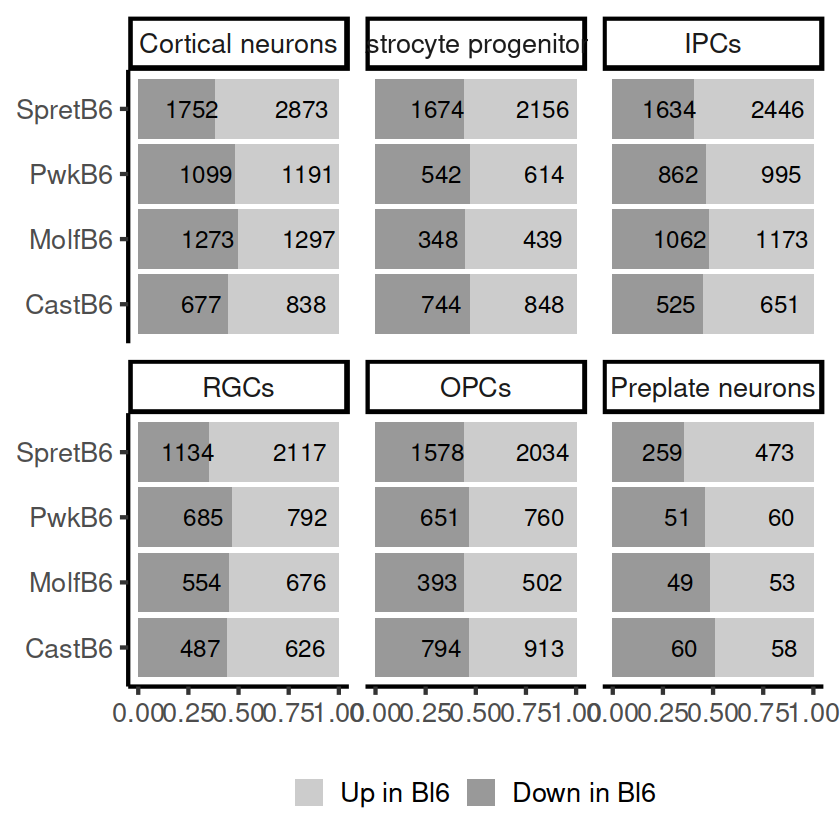

In [24]:
#summary <- melt(summary, id.vars = c("cell_type", "strain"))
#summary$value <- as.numeric(summary$value)
#summary <- summary[summary$variable != "notsignif",]
#summary$variable <- recode(summary$variable, "upreg" = "Up in Bl6",
#                           "downreg" = "Down in Bl6")
summary$variable <- factor(summary$variable, levels = c("Up in Bl6",
                                                        "Down in Bl6"))

ggplot(summary, aes(x = strain, y = value, fill = variable)) +
    geom_bar(position="fill", stat="identity") +
    facet_wrap(~cell_type)+
    theme_classic(base_size = 20) +
    theme(legend.position = "bottom", legend.title = element_blank(),
          axis.title.x = element_blank(), axis.title.y = element_blank()) +
    scale_fill_grey(start = 0.8, end = 0.6) +
    geom_text(data = summary, 
              aes(label = value), 
              position = position_fill(vjust = 0.7),
             size = 5) +
    coord_flip()